In [ ]:
#imports json, sys, numpy and random modules which will be used within the program

In [1]:
import json, sys, random
import numpy as np

sequential is a module that is used in deep learning to enable the machine to create multiple layers as it learns.
[Link to sequential information here](https://machinelearningmastery.com/keras-functional-api-deep-learning/)


In [ ]:
#uses the keras module to import sequential etc

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.optimizers import SGD
import keras.callbacks

Using TensorFlow backend.
C:\ProgramData\Miniconda3\envs\kaggle-ship\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Miniconda3\envs\kaggle-ship\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Miniconda3\envs\kaggle-ship\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Miniconda3\

PIL - An imaging library used to open, manipuilate or save many imaging formats
matplotlib - A plotting library used as an extension of numpy

In [3]:
from PIL import Image, ImageDraw 

In [4]:
from matplotlib import pyplot as plt

### Download and study the dataset

In [5]:
# download dataset from json object
#opens the json file and saves it as f, then loads this into the dataset variable before closing the file.
f = open("D:\\Data\\Ships in Satellite Imagery\\shipsnet.json")
dataset = json.load(f)
f.close()

In [11]:
#Names the dataset type (dict, list, array etc), identifies the keys/headers and their elements
type(dataset), dataset.keys(), dataset['labels'][:10]

(dict,
 dict_keys(['data', 'labels', 'locations', 'scene_ids']),
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# convert data to array
input_data = np.array(dataset['data']).astype('uint8')
output_data = np.array(dataset['labels']).astype('uint8')

INPUT

The dataset contains 2800 images. One image is represented as a vector of length 19200 elements.

In [17]:
# Get the current shape of the array (N x M)
print(input_data.shape)

# lets look at a slice of the array
input_data[0:10,0:10]

(2800, 19200)


array([[ 41,  40,  41,  44,  43,  40,  38,  40,  44,  42],
       [ 22,  19,  26,  26,  21,  20,  26,  24,  24,  28],
       [112, 112, 106, 104, 107, 109, 113, 115, 108, 126],
       [ 72,  76,  73,  72,  73,  74,  75,  73,  74,  73],
       [ 63,  58,  58,  63,  65,  66,  70,  66,  59,  67],
       [136, 136, 132, 133, 136, 129, 126, 128, 134, 135],
       [ 99,  94,  86,  91,  99,  96, 102, 103,  95,  97],
       [ 77,  76,  77,  75,  70,  77,  80,  78,  76,  76],
       [ 68,  75,  68,  61,  65,  73,  67,  61,  63,  67],
       [134, 134, 136, 134, 133, 136, 137, 136, 137, 137]], dtype=uint8)

In [18]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = input_data.reshape([-1, n_spectrum, weight, height])
X[0].shape

(3, 80, 80)

In [19]:
# get one chanel
pic = X[0]

rad_spectrum = pic[0]
green_spectrum = pic[1]
blue_spectum = pic[2]

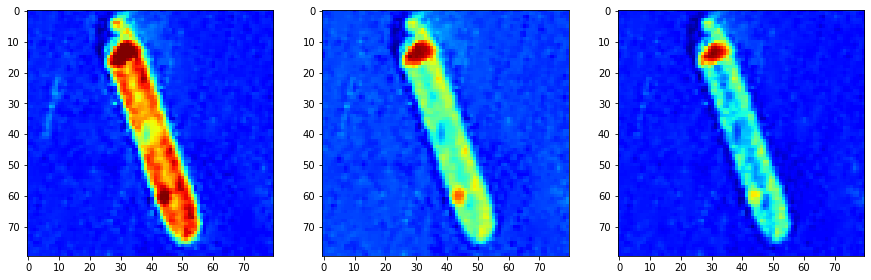

In [20]:
plt.figure(2, figsize = (5*3, 5*1))
plt.set_cmap('jet')

# show each channel
plt.subplot(1, 3, 1)
plt.imshow(rad_spectrum)

plt.subplot(1, 3, 2)
plt.imshow(green_spectrum)

plt.subplot(1, 3, 3)
plt.imshow(blue_spectum)
    
plt.show()

OUTPUT

The output is a vector of lenght 2800 elements.

In [21]:
output_data.shape

(2800,)

The vector contains int 0 and 1

In [22]:
output_data

array([1, 1, 1, ..., 0, 0, 0], dtype=uint8)

Vector contains of 2100 zeros and 700 units. This means that in a dataset of 700 images tagged with "ship" and 2100 images marked as "not ship".

In [23]:
np.bincount(output_data)

array([2100,  700], dtype=int64)

### Preparing data

In [24]:
# output encoding
y = np_utils.to_categorical(output_data, 2)

In [25]:
# shuffle all indexes
indexes = np.arange(2800)
np.random.shuffle(indexes)

In [26]:
X_train = X[indexes].transpose([0,2,3,1])
y_train = y[indexes]

In [27]:
# normalization
X_train = X_train / 255

### Traing network

In [28]:
np.random.seed(42)

In [29]:
# network design
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=(80, 80, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #40x40
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #20x20
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10x10
model.add(Dropout(0.25))

model.add(Conv2D(32, (10, 10), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #5x5
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [30]:
# optimization setup
sgd = SGD(lr=0.01, momentum=0.9, nesterov=True)

model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy'])

# training
model.fit(
    X_train, 
    y_train,
    batch_size=32,
    epochs=2,
    validation_split=0.2,
    shuffle=True,
    verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 2240 samples, validate on 560 samples
Epoch 1/2
 - 46s - loss: 0.4506 - accuracy: 0.8022 - val_loss: 0.3230 - val_accuracy: 0.8982
Epoch 2/2
 - 39s - loss: 0.2581 - accuracy: 0.8933 - val_loss: 0.2143 - val_accuracy: 0.9161


# Using network

### download image

In [31]:
#opens the bay image and saves it to the variable 'Image' before loading it
image = Image.open('D:\\Data\\sfbay.png\\sfbay_1.png')
pix = image.load()

In [32]:
#holds the number of percieved colours (RGB)
n_spectrum = 3
width = image.size[0]
height = image.size[1]

In [33]:
# create vector
picture_vector = []
#for loop checks each n_spectrum, height and width 
for chanel in range(n_spectrum):
    for y in range(height):
        for x in range(width):
            #appends the pixel, each iteration
            picture_vector.append(pix[x, y][chanel])

In [34]:

picture_vector = np.array(picture_vector).astype('uint8')
picture_tensor = picture_vector.reshape([n_spectrum, height, width]).transpose(1, 2, 0)

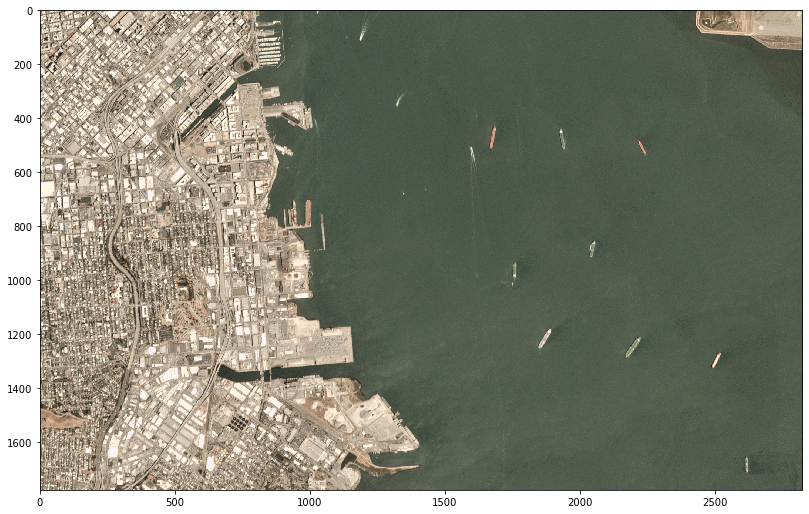

In [35]:
#used to reconfigure the size of the image
plt.figure(1, figsize = (15, 30))

#
plt.subplot(3, 1, 1)
plt.imshow(picture_tensor)

plt.show()

In [36]:
picture_tensor = picture_tensor.transpose(2,0,1)

### Search on the image

In [37]:
def cutting(x, y):
    area_study = np.arange(3*80*80).reshape(3, 80, 80)
    for i in range(80):
        for j in range(80):
            area_study[0][i][j] = picture_tensor[0][y+i][x+j]
            area_study[1][i][j] = picture_tensor[1][y+i][x+j]
            area_study[2][i][j] = picture_tensor[2][y+i][x+j]
    area_study = area_study.reshape([-1, 3, 80, 80])
    area_study = area_study.transpose([0,2,3,1])
    area_study = area_study / 255searchin
    sys.stdout.write('\rX:{0} Y:{1}  '.format(x, y))
    return area_study

In [38]:
def not_near(x, y, s, coordinates):
    result = True
    for e in coordinates:
        if x+s > e[0][0] and x-s < e[0][0] and y+s > e[0][1] and y-s < e[0][1]:
            result = False
    return result

In [39]:
#draws the lines to make sqare etc
def show_ship(x, y, acc, thickness=5):   
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x-th] = -1

    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+i][x+th+80] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y-th][x+i] = -1
        
    for i in range(80):
        for ch in range(3):
            for th in range(thickness):
                picture_tensor[ch][y+th+80][x+i] = -1

X:2180 Y:450  [[0.08352786 0.91647214]]


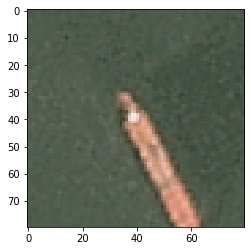

X:1560 Y:490  [[0.09269901 0.90730095]]


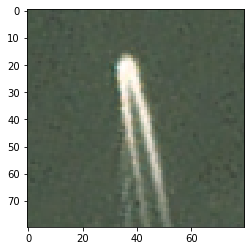

X:2740 Y:1690  

In [40]:
step = 10; coordinates = []
for y in range(int((height-(80-step))/step)):
    for x in range(int((width-(80-step))/step) ):
        area = cutting(x*step, y*step)
        result = model.predict(area)
        if result[0][1] > 0.90 and not_near(x*step,y*step, 88, coordinates):
            coordinates.append([[x*step, y*step], result])
            print(result)
            plt.imshow(area[0])
            plt.show()

for loop to display ships at identified locations

In [41]:
for e in coordinates:
    show_ship(e[0][0], e[0][1], e[1][0][1])

In [42]:
#picture_tensor = picture_tensor.transpose(2,0,1)
picture_tensor = picture_tensor.transpose(1,2,0)
picture_tensor.shape

(1777, 2825, 3)

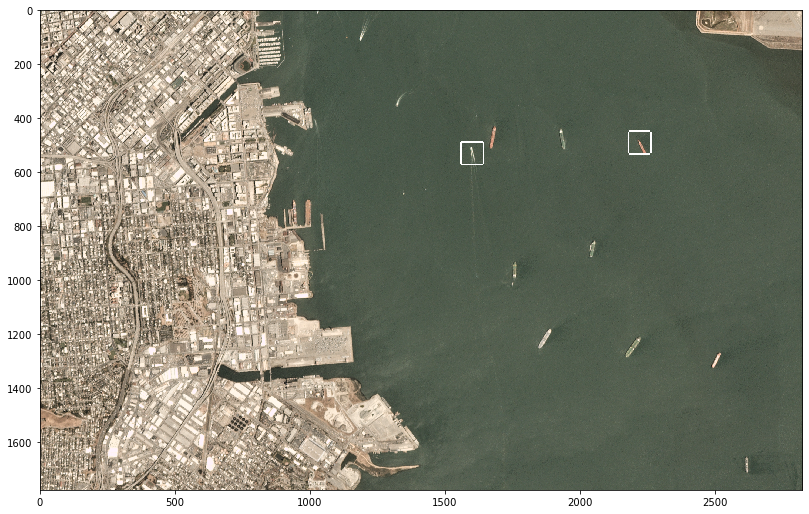

In [43]:
plt.figure(1, figsize = (15, 30))

plt.subplot(3,1,1)
plt.imshow(picture_tensor)

plt.show()